In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

import keras
from keras.models import Sequential
from keras import layers,regularizers


Using TensorFlow backend.


# Kannada-MNIST Baseline

In [2]:
trainDF = pd.read_csv('train.csv')
trainDF.head(11)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
TRAIN = 0.8
TEST = 1 - TRAIN
NUM_DATA_POINTS = trainDF.shape[0]

In [4]:
splitInd = int(NUM_DATA_POINTS * TRAIN)

ytrain = trainDF.label.values[:splitInd]
xtrain = trainDF.drop('label', axis=1)[:splitInd].values.reshape(splitInd, 28, 28, 1)

ytest = trainDF.label.values[splitInd:]
xtest = trainDF.drop('label', axis=1)[splitInd:].values.reshape(NUM_DATA_POINTS - splitInd, 28, 28, 1)

In [5]:
print(f"ytrain has shape {ytrain.shape}")
print(f"xtrain has shape {xtrain.shape}")
print(f"ytest has shape {ytest.shape}")
print(f"xtest has shape {xtest.shape}")


ytrain has shape (48000,)
xtrain has shape (48000, 28, 28, 1)
ytest has shape (12000,)
xtest has shape (12000, 28, 28, 1)


4


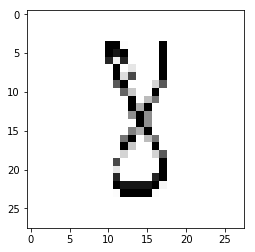

In [7]:
ind = 1234
print(ytrain[ind])
plt.imshow(xtrain[ind].reshape(28,28), cmap='Greys')

### model and training

In [8]:
bmodel = Sequential()
bmodel.add(layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)))
bmodel.add(layers.LeakyReLU(alpha=0.1))
bmodel.add(layers.Conv2D(64,  (3,3), padding='same'))
bmodel.add(layers.LeakyReLU(alpha=0.1))
bmodel.add(layers.Conv2D(64,  (3,3), padding='same'))
bmodel.add(layers.LeakyReLU(alpha=0.1))

bmodel.add(layers.Flatten())
bmodel.add(layers.Dense(256))
bmodel.add(layers.LeakyReLU(alpha=0.1))

bmodel.add(layers.Dense(10, activation='softmax'))

In [9]:
bmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
bmodel.fit(x=xtrain, y=ytrain, epochs=6)

Epoch 1/6
48000/48000 [==============================] - 564s 12ms/step - loss: 0.4069 - accuracy: 0.9655
Epoch 2/6
48000/48000 [==============================] - 494s 10ms/step - loss: 0.0585 - accuracy: 0.9840
Epoch 3/6
48000/48000 [==============================] - 510s 11ms/step - loss: 0.0572 - accuracy: 0.9860
Epoch 4/6
48000/48000 [==============================] - 501s 10ms/step - loss: 0.0783 - accuracy: 0.9847
Epoch 5/6
48000/48000 [==============================] - 549s 11ms/step - loss: 0.4568 - accuracy: 0.9830
Epoch 6/6
48000/48000 [==============================] - 554s 12ms/step - loss: 0.2497 - accuracy: 0.9887


In [10]:
bmodel.evaluate(xtest, ytest)

12000/12000 [==============================] - 43s 4ms/step


[0.057684235365040935, 0.9941666722297668]

# Dig-MNIST basline

In [5]:
trainDig = pd.read_csv('Dig-MNIST.csv')

In [6]:
trainDig.shape

(10240, 785)

In [7]:
ytestDig = trainDig.label.values
xtestDig = trainDig.drop('label', axis=1).values.reshape(-1, 28, 28, 1)

3


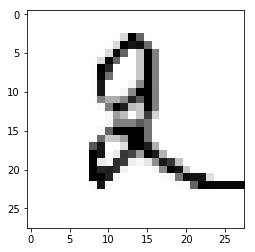

In [14]:
ind2 = 123
print(ytestDig[ind2])
plt.imshow(xtestDig[ind2].reshape(28,28), cmap='Greys')

# K-MNIST model does not work well on Dig-MNIST

In [15]:
bmodel.evaluate(xtestDig, ytestDig)

10240/10240 [==============================] - 36s 4ms/step


[8.675313774310052, 0.735156238079071]

## Dig-MNIST model and training

In [10]:
splitI = int(TRAIN * trainDig.shape[0])

ytrainDig = trainDig.label.values[:splitI]
xtrainDig = trainDig.drop('label', axis=1)[:splitI].values.reshape(-1, 28, 28, 1)

ytestDig2 = trainDig.label.values[splitI:]
xtestDig2 = trainDig.drop('label', axis=1)[splitI:].values.reshape(-1, 28, 28, 1)

In [11]:
digmodel = Sequential()
digmodel.add(layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)))
digmodel.add(layers.LeakyReLU(alpha=0.1))
digmodel.add(layers.Conv2D(64,  (3,3), padding='same'))
digmodel.add(layers.LeakyReLU(alpha=0.1))
digmodel.add(layers.Conv2D(64,  (3,3), padding='same'))
digmodel.add(layers.LeakyReLU(alpha=0.1))

digmodel.add(layers.MaxPooling2D(2,2))
digmodel.add(layers.Dropout(0.2))

digmodel.add(layers.Flatten())
digmodel.add(layers.Dense(256))
digmodel.add(layers.LeakyReLU(alpha=0.1))

digmodel.add(layers.Dense(10, activation='softmax'))

In [12]:
digmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
digmodel.fit(x=xtrainDig, y=ytrainDig, epochs=10)

Epoch 1/10
8192/8192 [==============================] - 94s 11ms/step - loss: 1.6609 - accuracy: 0.8322
Epoch 2/10
8192/8192 [==============================] - 107s 13ms/step - loss: 0.1883 - accuracy: 0.9410
Epoch 3/10
8192/8192 [==============================] - 111s 14ms/step - loss: 0.1049 - accuracy: 0.9644
Epoch 4/10
8192/8192 [==============================] - 101s 12ms/step - loss: 0.0713 - accuracy: 0.9773
Epoch 5/10
8192/8192 [==============================] - 75s 9ms/step - loss: 0.0584 - accuracy: 0.9803
Epoch 6/10
8192/8192 [==============================] - 98s 12ms/step - loss: 0.0618 - accuracy: 0.9775
Epoch 7/10
8192/8192 [==============================] - 91s 11ms/step - loss: 0.0523 - accuracy: 0.9834
Epoch 8/10
8192/8192 [==============================] - 90s 11ms/step - loss: 0.1049 - accuracy: 0.9725
Epoch 9/10
8192/8192 [==============================] - 114s 14ms/step - loss: 0.1078 - accuracy: 0.9695
Epoch 10/10
8192/8192 [==============================] - 90s 

In [13]:
digmodel.evaluate(xtestDig2, ytestDig2)

2048/2048 [==============================] - 7s 4ms/step


[0.4223419396749364, 0.92578125]

## Dig-MNIST model also not great for Kannada-MNIST

In [14]:
digmodel.evaluate(xtest, ytest)

12000/12000 [==============================] - 39s 3ms/step


[1.3103604513406752, 0.7848333120346069]